## Objective - Accurately clustering customers based on the spending patterns
### Model Trained - K-Means Clustering and Hierarchical Clustering

### 1. Importing the Necessary Libraries and Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_file_path = '/Users/varunsinghchhetri/Downloads/final 2/customers.csv'
transaction_folder_path = '/Users/varunsinghchhetri/Downloads/MLAA Task 3 Assignment Data Folder'


In [ ]:
customer_df = pd.read_csv(customer_file_path, delimiter = '|')


In [ ]:
customer_df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


In [ ]:
customer_df.shape

(1000, 15)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


In [ ]:
customer_df.describe()

,cc_num,zip,lat,long,city_pop,acct_num
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,3.656964e+17,51786.20900,37.422795,-92.505277,2.867058e+05,4.995849e+11
std,1.227337e+18,29933.13195,5.574397,17.510134,5.329632e+05,2.894933e+11
min,6.040027e+10,1571.00000,19.589300,-159.368300,1.050000e+02,2.348758e+09
25%,1.800353e+14,27528.25000,33.712500,-99.159475,2.022950e+04,2.620636e+11
50%,3.517359e+15,49016.00000,38.431750,-87.156600,6.728250e+04,4.915295e+11
75%,4.538733e+15,78599.00000,41.220300,-80.018850,2.499788e+05,7.571575e+11
max,4.986227e+18,99705.00000,64.780500,-68.244800,2.906700e+06,9.993899e+11


In [ ]:
# Merging the transaction files in a single DataFrame
transaction_files = [file for file in os.listdir(transaction_folder_path) if file.endswith('.csv')]

dataframes = []
for file in transaction_files:
    file_path = os.path.join(transaction_folder_path, file)
    df = pd.read_csv(file_path, delimiter = '|')
    dataframes.append(df)

transactions_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
transactions_df.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4896331812335761701,149852234418,f3ec0819590302134f03ffdc2f44697f,1646060228,gas_transport,65.17,0,"Larson, Ryan and Huang",38.143430,-90.327335
1,4896331812335761701,149852234418,c1607c993e41f2c3b42d72d1506bef7b,1644848624,gas_transport,47.58,0,Myers-Reed,39.119498,-90.760379
2,4896331812335761701,149852234418,6f530db25d20fe351249a54491fd3fde,1645632153,gas_transport,64.43,0,Baker-Bullock,39.384368,-90.361517
3,4896331812335761701,149852234418,6d11805f2acd938fec99376001afafe8,1645311286,gas_transport,82.47,0,Spencer-Hall,39.443567,-89.752400
4,4896331812335761701,149852234418,605342f297c575cb1ccf2c08cad082ee,1641571926,gas_transport,50.28,0,"King, Rodriguez and Hancock",38.857278,-89.609525


In [ ]:
transactions_df.shape

(4260904, 10)

In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      object 
 1   acct_num    object 
 2   trans_num   object 
 3   unix_time   object 
 4   category    object 
 5   amt         float64
 6   is_fraud    object 
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
dtypes: float64(3), object(7)
memory usage: 325.1+ MB


In [ ]:
transactions_df.describe()

,amt,merch_lat,merch_long
count,4.260904e+06,4.260904e+06,4.260904e+06
mean,6.898790e+01,3.735276e+01,-9.247610e+01
std,1.618467e+02,5.504630e+00,1.741603e+01
min,1.000000e+00,1.859001e+01,-1.603677e+02
25%,9.100000e+00,3.370138e+01,-9.903072e+01
50%,4.449000e+01,3.819365e+01,-8.727445e+01
75%,8.158000e+01,4.120567e+01,-7.966098e+01
max,4.130053e+04,6.577610e+01,-6.724632e+01


In [ ]:
# Merging the customer and the transaction file
merged_df = pd.merge(customer_df, transactions_df, left_on=['cc_num', 'acct_num'], right_on=['cc_num', 'acct_num'], how='inner')

In [ ]:
merged_df.shape

(4260904, 23)

In [ ]:
merged_df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  trans_num   object 
 16  unix_time   object 
 17  category    object 
 18  amt         float64
 19  is_fraud    object 
 20  merchant    object 
 21  merch_lat   float64
 22  merch_long  float64
dtypes: float64(5), int64(2), object(16)
memory usage: 780.2+ MB


In [ ]:
merged_df.describe()

,zip,lat,long,city_pop,amt,merch_lat,merch_long
count,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06
mean,5.190384e+04,3.735269e+01,-9.247593e+01,3.038011e+05,6.898790e+01,3.735276e+01,-9.247610e+01
std,2.996720e+04,5.474364e+00,1.740613e+01,5.696231e+05,1.618467e+02,5.504630e+00,1.741603e+01
min,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,1.000000e+00,1.859001e+01,-1.603677e+02
25%,2.750500e+04,3.378360e+01,-9.868950e+01,2.010300e+04,9.100000e+00,3.370138e+01,-9.903072e+01
50%,4.920200e+04,3.824200e+01,-8.717940e+01,6.759300e+04,4.449000e+01,3.819365e+01,-8.727445e+01
75%,7.870400e+04,4.098200e+01,-7.994400e+01,2.420370e+05,8.158000e+01,4.120567e+01,-7.966098e+01
max,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,4.130053e+04,6.577610e+01,-6.724632e+01


In [ ]:
merged_df.isnull().sum()

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [ ]:
merged_df.nunique()

ssn               983
cc_num            983
first             365
last              479
gender              2
street            983
city              726
state              51
zip               939
lat               938
long              937
city_pop          764
job               505
dob               962
acct_num          983
trans_num     4260904
unix_time     4114752
category           14
amt             81218
is_fraud            2
merchant        21977
merch_lat     3767589
merch_long    4031685
dtype: int64

### 2. Data Cleaning and Preparation

In [ ]:
# Removing the columns containing sensitive information
df_copy = merged_df.copy()

In [ ]:
sensitive_columns = ['ssn','cc_num','trans_num','first','last']

In [ ]:
df_copy = merged_df.drop(columns = sensitive_columns, axis=1)

In [ ]:
address = ['street', 'state', 'zip', 'city', 'city_pop']

In [ ]:
# Removing address columns from the DataFrame
df_copy.drop(columns=address, axis=1, inplace=True)

In [ ]:
df_copy.head()

,gender,lat,long,job,dob,acct_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,M,40.1809,-75.2156,Accounting technician,1959-10-03,888022315787,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,M,40.1809,-75.2156,Accounting technician,1959-10-03,888022315787,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,M,40.1809,-75.2156,Accounting technician,1959-10-03,888022315787,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,M,40.1809,-75.2156,Accounting technician,1959-10-03,888022315787,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,M,40.1809,-75.2156,Accounting technician,1959-10-03,888022315787,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [ ]:
# Check for duplicates
duplicates = df_copy.duplicated()

# Print number of duplicates
print(f"Number of duplicates: {duplicates.sum()}")

Number of duplicates: 0


###### Handling the Unix Timestamp

In [ ]:
# Convert "unix_time" column to datetime timestamp
df_copy['unix_time'] = pd.to_datetime(df_copy['unix_time'], unit='s')

In [ ]:
df_copy['unix_time']

0         2019-05-24 17:39:10
1         2019-09-25 15:31:59
2         2019-12-24 16:40:01
3         2019-10-18 19:50:38
4         2019-02-10 23:13:20
                  ...        
4260899   2022-12-13 05:06:46
4260900   2022-12-02 01:08:49
4260901   2022-10-14 01:22:33
4260902   2022-12-11 08:53:14
4260903   2022-12-25 03:53:33
Name: unix_time, Length: 4260904, dtype: datetime64[ns]

In [ ]:
# Converting the Date and Time, by creating new rows
# Create separate "date" and "time" columns
df_copy['date'] = df_copy['unix_time'].dt.date
df_copy['time'] = df_copy['unix_time'].dt.time
df_copy['year'] = df_copy['unix_time'].dt.year
df_copy['month'] = df_copy['unix_time'].dt.month

In [ ]:
# Remove the "unix_time" column
df_copy.drop('unix_time', axis=1, inplace=True)


###### Calculating the distance between the customer and merchant

In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 3956  # Radius of the Earth in kilometers. Using 3956 for miles.
    return c * r

df_copy['distance_customer_merchant'] = haversine(df_copy['lat'], df_copy['long'], df_copy['merch_lat'], df_copy['merch_long'])


######  Calculating Age by using D.O.B

In [ ]:
#check datatype of column 'dob'
df_copy['dob'].dtype

dtype('O')

In [ ]:
# Convert 'dob' column to datetime type
df_copy['dob'] = pd.to_datetime(df_copy['dob'], format='%Y-%m-%d').dt.date

In [ ]:
from datetime import datetime

#function to calculate age from dob
def calculate_age(dob):
    today = datetime.today().date()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

In [ ]:
# Apply the calculate_age function to 'dob' column
df_copy['age'] = df_copy['dob'].apply(calculate_age)

In [ ]:
df_copy['age'].unique()

array([63, 59, 49, 80, 84, 46, 20, 38, 85, 55, 21, 45, 36, 31, 40, 51, 69,
       50, 39, 60, 23, 47, 35, 64, 53, 61, 58, 74, 30, 29, 89, 41, 42, 28,
       34, 44, 65, 32, 56, 66, 67, 57, 43, 82, 48, 68, 73, 62, 52, 24, 77,
       72, 71, 37, 27, 81, 26, 22, 78, 70, 33, 75, 25, 16, 19, 95, 92, 86,
       76, 83, 18, 54, 15, 88, 93, 87, 79, 91, 90, 94, 17])

In [ ]:
# Remove the "dob" column
df_copy.drop('dob', axis=1, inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   gender                      object 
 1   lat                         float64
 2   long                        float64
 3   job                         object 
 4   acct_num                    object 
 5   category                    object 
 6   amt                         float64
 7   is_fraud                    object 
 8   merchant                    object 
 9   merch_lat                   float64
 10  merch_long                  float64
 11  date                        object 
 12  time                        object 
 13  year                        int64  
 14  month                       int64  
 15  distance_customer_merchant  float64
 16  age                         int64  
dtypes: float64(6), int64(3), object(8)
memory usage: 585.1+ MB


### 3. Exploratory Data Analysis

In [ ]:
gender_counts = df_copy['gender'].value_counts()

print(gender_counts)

F    2175896
M    2085008
Name: gender, dtype: int64


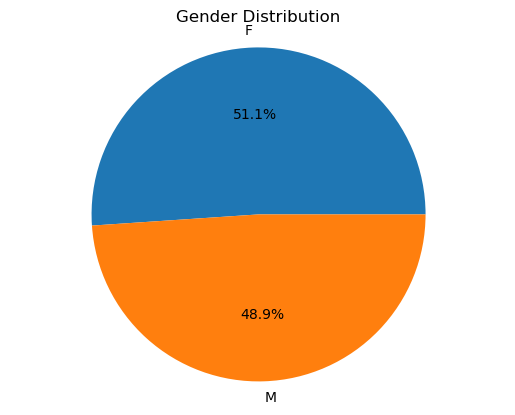

In [ ]:
# Plotting the gender counts as a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

In [ ]:
unique_jobs = df_copy['job'].unique()

print(unique_jobs)

['Accounting technician' 'Professor Emeritus'
 'International aid/development worker' 'Seismic interpreter'
 'Medical laboratory scientific officer' 'Community arts worker'
 'Plant breeder/geneticist' 'Quarry manager' 'Retail buyer'
 'Acupuncturist' 'Surgeon' 'Television floor manager'
 'Maintenance engineer' 'Commercial art gallery manager'
 'Optician, dispensing' 'Engineer, broadcasting (operations)'
 'Health and safety inspector' 'Hydrogeologist'
 'Programme researcher, broadcasting/film/video' 'Insurance risk surveyor'
 'Solicitor' 'Recycling officer' 'Therapist, speech and language'
 'Astronomer' 'Accountant, chartered' 'Industrial buyer'
 'Magazine features editor' 'Writer' 'Pathologist' 'Energy engineer'
 'Catering manager' 'Paramedic' 'Museum/gallery curator'
 'Copywriter, advertising' 'Call centre manager'
 'Commercial horticulturist' 'Occupational therapist'
 'Agricultural engineer' 'Biochemist, clinical' 'Patent attorney'
 'Management consultant' 'Chemist, analytical' 'Thera

In [ ]:
job_counts = df_copy['job'].value_counts()

print(job_counts)

Computer games developer      33859
Radio producer                28746
Patent attorney               27990
Teacher, adult education      27692
General practice doctor       27279
                              ...  
Waste management officer        358
Nurse, learning disability      358
Geneticist, molecular            12
Sales executive                   7
Loss adjuster, chartered          7
Name: job, Length: 505, dtype: int64


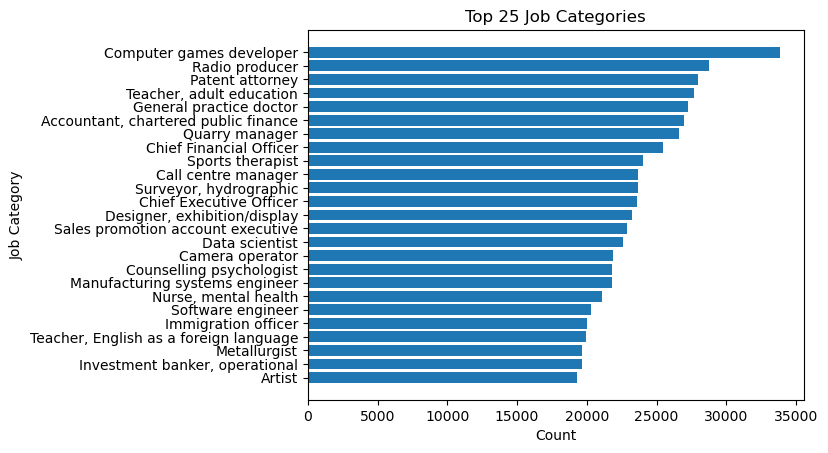

In [ ]:
# Plotting the unique job categories
# Select the top 25 job categories
top_25_jobs = job_counts.head(25).sort_values(ascending=True)

# Plotting the top 25 job categories
plt.barh(top_25_jobs.index, top_25_jobs.values)
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.title('Top 25 Job Categories')
plt.show()

In [ ]:
unique_categories = df_copy['category'].unique()

print(unique_categories)

['gas_transport' 'grocery_pos' 'misc_net' 'misc_pos' 'entertainment'
 'food_dining' 'shopping_pos' 'shopping_net' 'grocery_net' 'personal_care'
 'health_fitness' 'travel' 'home' 'kids_pets']


In [ ]:
category_counts = df_copy['category'].value_counts()

print(category_counts)

shopping_pos      420268
home              403237
grocery_pos       401000
kids_pets         372055
gas_transport     365233
food_dining       320989
entertainment     312478
shopping_net      307013
personal_care     300730
misc_pos          281977
health_fitness    265986
misc_net          191290
grocery_net       181614
travel            137034
Name: category, dtype: int64


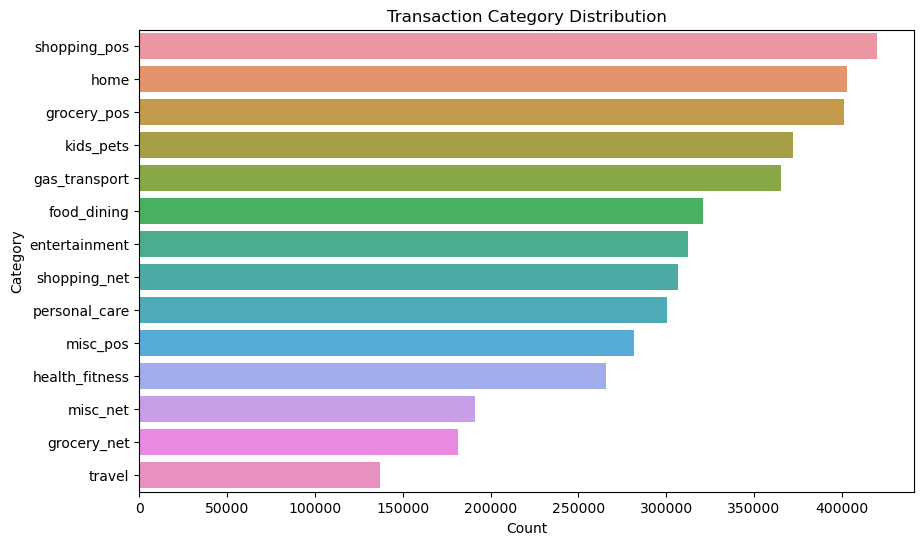

In [ ]:
# Category Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, y='category', order=df_copy['category'].value_counts().index)
plt.title('Transaction Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

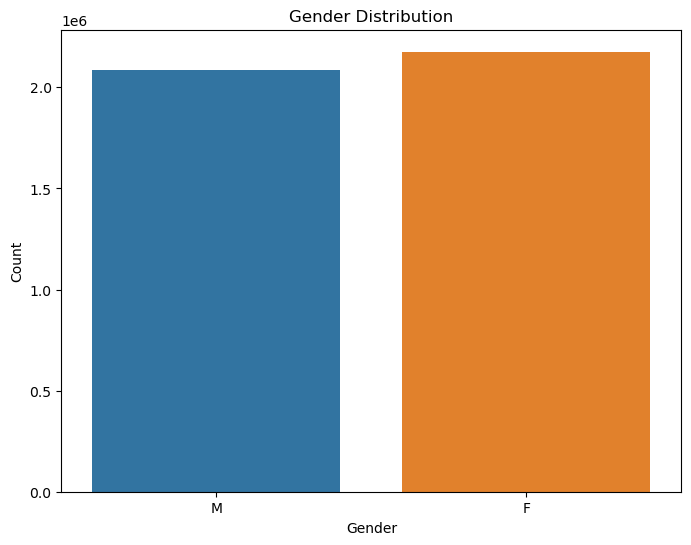

In [ ]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

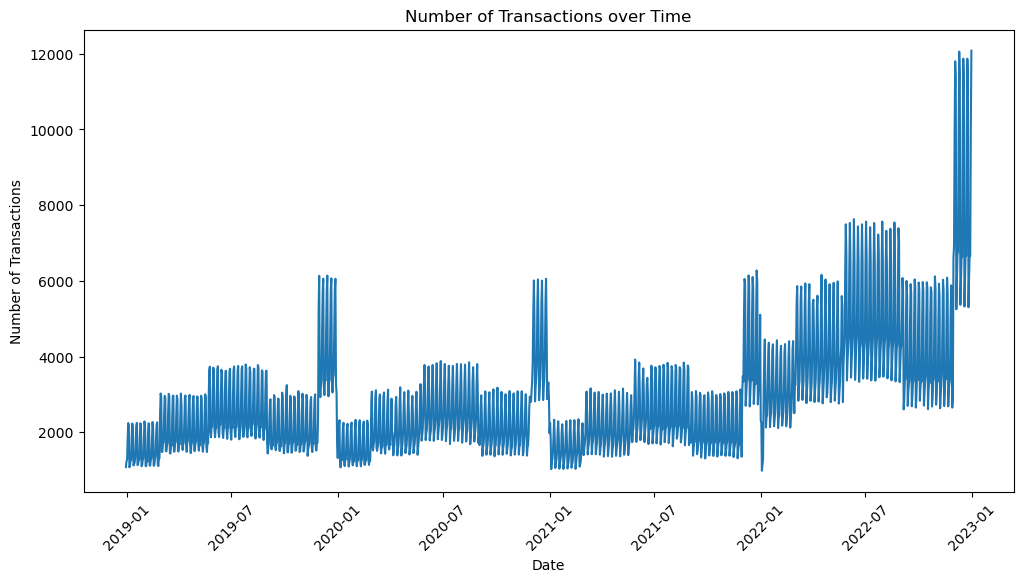

In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'])  
transactions_by_date = df_copy['date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(transactions_by_date.index, transactions_by_date.values)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions over Time')
plt.xticks(rotation=45)
plt.show()

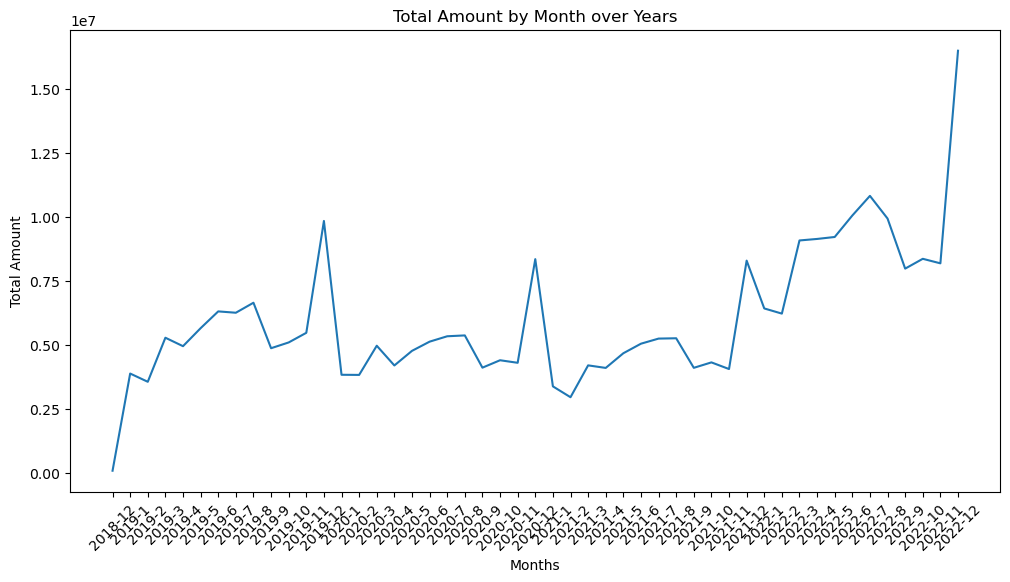

In [ ]:
# Total Amount by Month over Years
total_amt_by_month_over_years= df_copy.groupby(['year', 'month'])['amt'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(total_amt_by_month_over_years.index, total_amt_by_month_over_years['amt'])
plt.xlabel('Months')
plt.ylabel('Total Amount')
plt.title('Total Amount by Month over Years')
plt.xticks(total_amt_by_month_over_years.index, total_amt_by_month_over_years['year'].astype(str) + '-' + total_amt_by_month_over_years['month'].astype(str))
plt.xticks(rotation=45)
plt.show()

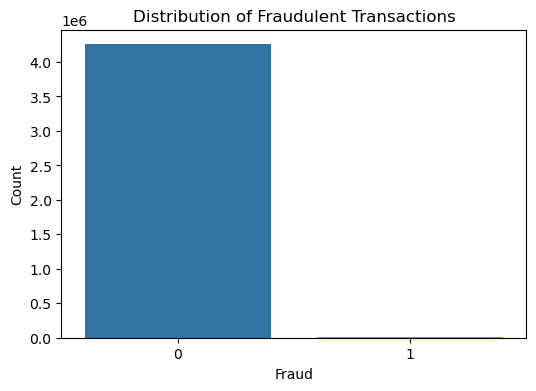

In [ ]:
# Fraud Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df_copy)
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions')
plt.show()


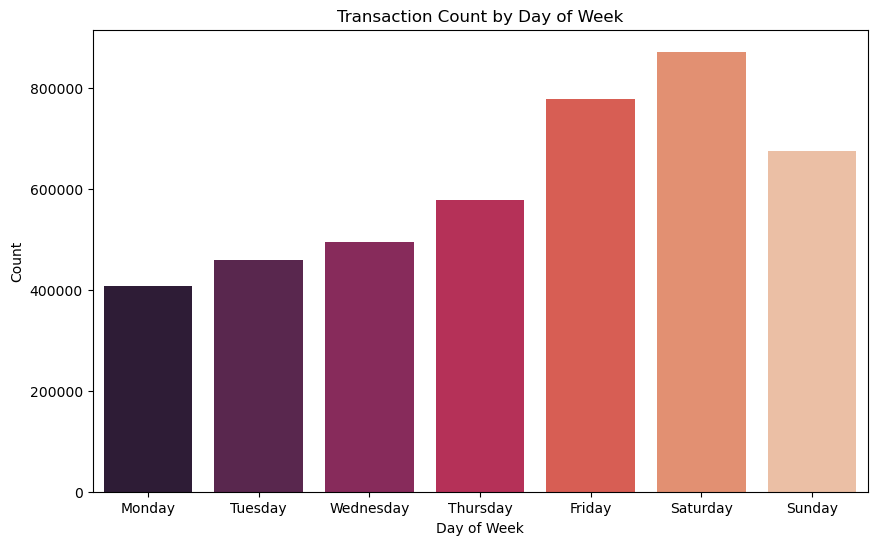

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['day_of_week'] = df_copy['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_copy, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='rocket')
plt.title('Transaction Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

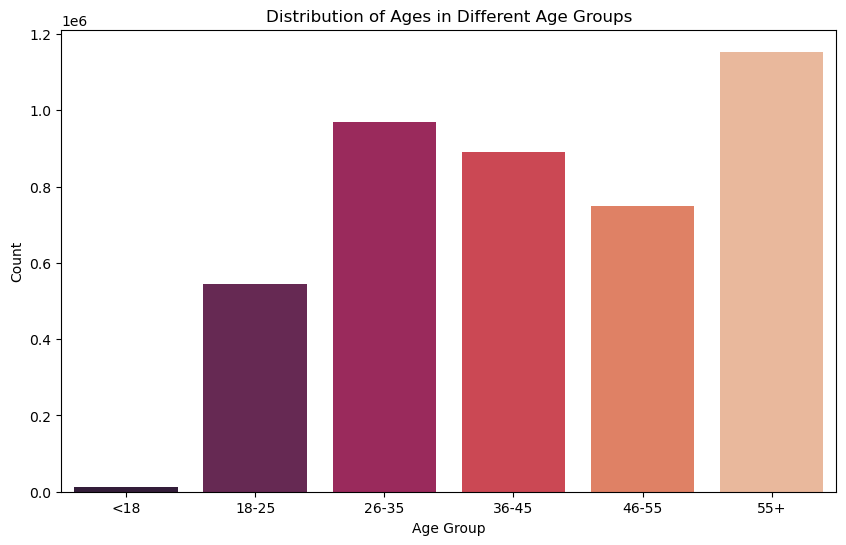

In [ ]:
age_groups = ['<18', '18-25', '26-35', '36-45', '46-55', '55+']
age_counts = [
    round(df_copy[df_copy['age'] < 18]['age'].count()),
    round(df_copy[df_copy['age'].between(18, 25)]['age'].count()),
    round(df_copy[df_copy['age'].between(26, 35)]['age'].count()),
    round(df_copy[df_copy['age'].between(36, 45)]['age'].count()),
    round(df_copy[df_copy['age'].between(46, 55)]['age'].count()),
    round(df_copy[df_copy['age'] >= 55]['age'].count())
]

plt.figure(figsize=(10, 6))
sns.barplot(x=age_groups, y=age_counts, palette='rocket')
plt.title('Distribution of Ages in Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


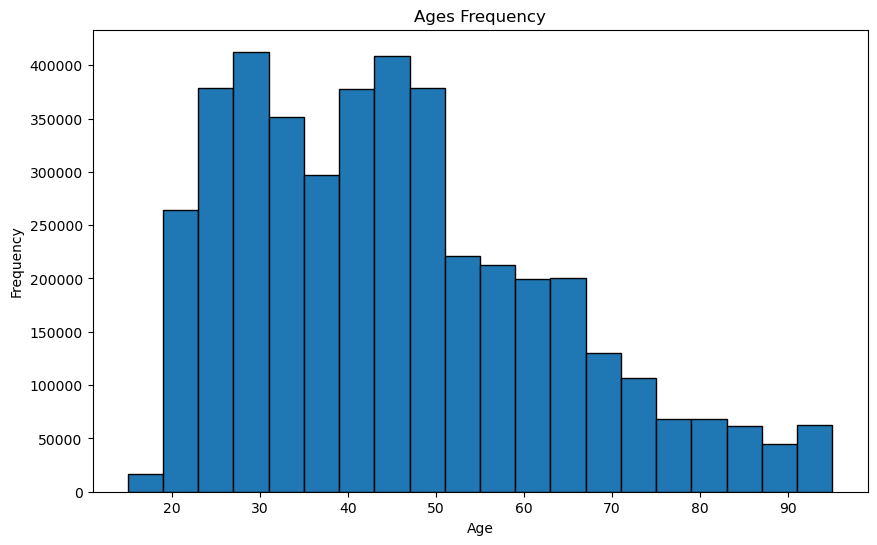

In [ ]:
# Age Frequnecies
plt.figure(figsize=(10, 6))
plt.title("Ages Frequency")
plt.hist(df_copy["age"], bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:
columns_dropped = ['lat', 'long', 'is_fraud', 'merch_lat', 'merch_long']

In [ ]:
df_clean = df_copy.drop(columns = columns_dropped, axis=1)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 13 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   gender                      object        
 1   job                         object        
 2   acct_num                    object        
 3   category                    object        
 4   amt                         float64       
 5   merchant                    object        
 6   date                        datetime64[ns]
 7   time                        object        
 8   year                        int64         
 9   month                       int64         
 10  distance_customer_merchant  float64       
 11  age                         int64         
 12  day_of_week                 object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 455.1+ MB


### 4.Feature Engineering

In [ ]:
# Mapping the categories into broader categories to reduce dimensions
category_mapping = {
    'gas_transport': 'utility',
    'grocery_pos': 'utility',
    'misc_net': 'miscellaneous',
    'misc_pos': 'miscellaneous',
    'entertainment': 'entertainment',
    'food_dining': 'entertainment',
    'shopping_pos': 'shopping',
    'shopping_net': 'shopping',
    'grocery_net': 'utility',
    'personal_care': 'utility',
    'health_fitness': 'utility',
    'travel': 'entertainment',
    'home': 'shopping',
    'kids_pets': 'shopping'
}

# Merging the 14 different categories into 4 major types
df_clean['category_major'] = df_clean['category'].replace(category_mapping)


In [ ]:
df_clean = df_clean.drop('category', axis=1)


In [ ]:
# 1. Total Amount Spent Per Account Number
df_clean['total_amount_spent'] = df_clean.groupby('acct_num')['amt'].transform('sum')


In [ ]:
# Calculate the mean distance from the merchant per account number
mean_distance = df_clean.groupby('acct_num')['distance_customer_merchant'].mean().reset_index()

# Rename the mean distance column for clarity
mean_distance = mean_distance.rename(columns={'distance_customer_merchant': 'mean_distance'})

# Merge the original DataFrame with the mean distance DataFrame based on the account number
df_clean = df_clean.merge(mean_distance, on='acct_num')

In [ ]:
df_clean.head()

,gender,job,acct_num,amt,merchant,date,time,year,month,distance_customer_merchant,age,day_of_week,category_major,total_amount_spent,mean_distance
0,M,Accounting technician,888022315787,69.12,Phillips Group,2019-05-24,17:39:10,2019,5,51.548009,63,Friday,utility,206986.2,46.587624
1,M,Accounting technician,888022315787,68.11,Tucker Ltd,2019-09-25,15:31:59,2019,9,52.456222,63,Wednesday,utility,206986.2,46.587624
2,M,Accounting technician,888022315787,40.35,Dixon PLC,2019-12-24,16:40:01,2019,12,75.643038,63,Tuesday,miscellaneous,206986.2,46.587624
3,M,Accounting technician,888022315787,96.22,Lambert-Cooper,2019-10-18,19:50:38,2019,10,47.688617,63,Friday,utility,206986.2,46.587624
4,M,Accounting technician,888022315787,71.89,Griffith LLC,2019-02-10,23:13:20,2019,2,53.236003,63,Sunday,utility,206986.2,46.587624


In [ ]:
# Grouping the merged dataframe by account number and aggregate the values
grouped_df = df_clean.groupby('acct_num').agg({
    'age': 'first',         
    'job': 'first',         
    'gender': 'first',       
    'total_amount_spent': 'first',   
    'mean_distance': 'first'
})

grouped_df.reset_index(inplace=True)

In [ ]:
grouped_df

,acct_num,age,job,gender,total_amount_spent,mean_distance
0,2348758451,46,"Surveyor, minerals",M,231213.49,46.105705
1,2468061102,64,"Nurse, adult",F,333584.22,48.802957
2,3005591724,77,"Engineer, automotive",F,157228.81,45.945575
3,3418322859,21,Operational investment banker,F,317894.68,47.842071
4,4322238535,92,Catering manager,M,119646.95,51.673790
...,...,...,...,...,...,...
978,994419325906,38,Adult guidance worker,F,489864.86,48.345622
979,995642772692,44,"Merchandiser, retail",M,258501.10,48.733033
980,997039479727,49,Secondary school teacher,M,448896.34,48.997026
981,997762397943,70,"Social research officer, government",M,304927.71,48.096943


In [ ]:
# Group the DataFrame by account number and year, and calculate the sum of the amount spent
grouped = df_clean.groupby(['acct_num', 'year'])['amt'].sum().reset_index()

# Reshape the data to have each year as a separate column
pivot_table = grouped.pivot(index='acct_num', columns='year', values='amt').reset_index()

# Save the resulting DataFrame into a new DataFrame
new_df = pivot_table.copy()

In [ ]:
new_df

year,acct_num,2018,2019,2020,2021,2022
0,2348758451,96.05,44751.59,42558.63,33854.14,109953.08
1,2468061102,5.75,71680.46,65693.82,62842.91,133361.28
2,3005591724,9.47,28348.92,20984.32,26084.58,81801.52
3,3418322859,NaN,81852.64,70155.04,72729.50,93157.50
4,4322238535,NaN,28855.27,25590.28,19874.23,45327.17
...,...,...,...,...,...,...
978,994419325906,471.04,138915.67,94457.26,75728.62,180292.27
979,995642772692,NaN,43919.04,39905.62,36905.87,137770.57
980,997039479727,117.46,95788.01,84064.58,85971.43,182954.86
981,997762397943,8.14,67036.33,79074.84,67050.30,91758.10


In [ ]:

# Group the DataFrame by account number, category, and year, and calculate the sum of the amount spent
grouped_exp = df_clean.groupby(['acct_num', 'category_major'])['amt'].sum().reset_index()

# Reshape the data to have each year as a separate column
pivot_table_exp = grouped_exp.pivot_table(index='acct_num', columns='category_major', values='amt').reset_index()

# Save the resulting DataFrame into a new DataFrame
new_df_exp = pivot_table_exp.copy()

In [ ]:
new_df_exp

category_major,acct_num,entertainment,miscellaneous,shopping,utility
0,2348758451,33624.91,29526.36,76066.33,91995.89
1,2468061102,65231.17,35086.77,113876.59,119389.69
2,3005591724,30790.58,14823.07,52330.66,59284.50
3,3418322859,62692.40,36252.98,101248.83,117700.47
4,4322238535,23025.93,15025.52,38516.20,43079.30
...,...,...,...,...,...
978,994419325906,61533.11,77867.54,161523.63,188940.58
979,995642772692,46914.63,29118.78,85361.51,97106.18
980,997039479727,76159.15,46832.22,155334.73,170570.24
981,997762397943,63238.44,33302.97,105480.29,102906.01


In [ ]:
merged1_df = pd.merge(grouped_df, new_df_exp, on='acct_num')

In [ ]:
final_merged_df = pd.merge(merged1_df, new_df, on='acct_num')

In [ ]:
# Merging the final DataFrame using the 3 created DataFrames
final_merged_df

,acct_num,age,job,gender,total_amount_spent,mean_distance,entertainment,miscellaneous,shopping,utility,2018,2019,2020,2021,2022
0,2348758451,46,"Surveyor, minerals",M,231213.49,46.105705,33624.91,29526.36,76066.33,91995.89,96.05,44751.59,42558.63,33854.14,109953.08
1,2468061102,64,"Nurse, adult",F,333584.22,48.802957,65231.17,35086.77,113876.59,119389.69,5.75,71680.46,65693.82,62842.91,133361.28
2,3005591724,77,"Engineer, automotive",F,157228.81,45.945575,30790.58,14823.07,52330.66,59284.50,9.47,28348.92,20984.32,26084.58,81801.52
3,3418322859,21,Operational investment banker,F,317894.68,47.842071,62692.40,36252.98,101248.83,117700.47,NaN,81852.64,70155.04,72729.50,93157.50
4,4322238535,92,Catering manager,M,119646.95,51.673790,23025.93,15025.52,38516.20,43079.30,NaN,28855.27,25590.28,19874.23,45327.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,994419325906,38,Adult guidance worker,F,489864.86,48.345622,61533.11,77867.54,161523.63,188940.58,471.04,138915.67,94457.26,75728.62,180292.27
979,995642772692,44,"Merchandiser, retail",M,258501.10,48.733033,46914.63,29118.78,85361.51,97106.18,NaN,43919.04,39905.62,36905.87,137770.57
980,997039479727,49,Secondary school teacher,M,448896.34,48.997026,76159.15,46832.22,155334.73,170570.24,117.46,95788.01,84064.58,85971.43,182954.86
981,997762397943,70,"Social research officer, government",M,304927.71,48.096943,63238.44,33302.97,105480.29,102906.01,8.14,67036.33,79074.84,67050.30,91758.10


In [ ]:
final_merged_df.isnull().sum()

acct_num                0
age                     0
job                     0
gender                  0
total_amount_spent      0
mean_distance           0
entertainment           7
miscellaneous           0
shopping                0
utility                 0
2018                  424
2019                   95
2020                   97
2021                   99
2022                    3
dtype: int64

In [ ]:
# Fill missing values in the entire DataFrame with the mean of each column
df_final = final_merged_df.fillna(final_merged_df.mean())

/var/folders/lz/7z4s1cw55w31v9lp9ryhn6_h0000gn/T/ipykernel_1629/1786478141.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final = final_merged_df.fillna(final_merged_df.mean())


In [ ]:
df_final.isnull().sum()

acct_num              0
age                   0
job                   0
gender                0
total_amount_spent    0
mean_distance         0
entertainment         0
miscellaneous         0
shopping              0
utility               0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
dtype: int64

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 982
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_num            983 non-null    int64  
 1   age                 983 non-null    int64  
 2   job                 983 non-null    object 
 3   gender              983 non-null    object 
 4   total_amount_spent  983 non-null    float64
 5   mean_distance       983 non-null    float64
 6   entertainment       983 non-null    float64
 7   miscellaneous       983 non-null    float64
 8   shopping            983 non-null    float64
 9   utility             983 non-null    float64
 10  2018                983 non-null    float64
 11  2019                983 non-null    float64
 12  2020                983 non-null    float64
 13  2021                983 non-null    float64
 14  2022                983 non-null    float64
dtypes: float64(11), int64(2), object(2)
memory usage: 122.9+ 

### 5.Clustering

### K-mean Clustering

In [ ]:
X = df_final.copy()

In [ ]:
X = df_final.drop(['acct_num','job'], axis = 1)

In [ ]:
# Perform one-hot encoding on the 'category' column
one_hot_encoded = pd.get_dummies(X['gender'])

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, one_hot_encoded], axis=1)
X = X.drop('gender', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/varunsinghchhetri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/varunsinghchhetri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# Reduce Dimensions from PCA
# Import PCA from sklearn
from sklearn.decomposition import PCA

In [ ]:
# Instantiate an object called `pca` from the PCA class
pca = PCA()

In [ ]:
# Fit `pca` on the scaled data
pca.fit(X_scaled)

PCA()

In [ ]:
pc_list = [f'PC{i}' for i in list(range(1, pca.n_features_ + 1))]
pc_list

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

In [ ]:
pc_data = {
    'pc': pc_list,
    'exp_variance': list(pca.explained_variance_ratio_)
}
pc_data

{'pc': ['PC1',
  'PC2',
  'PC3',
  'PC4',
  'PC5',
  'PC6',
  'PC7',
  'PC8',
  'PC9',
  'PC10',
  'PC11',
  'PC12',
  'PC13',
  'PC14'],
 'exp_variance': [0.6003074706767498,
  0.14473427509156467,
  0.07263139443651627,
  0.06206727702815229,
  0.059237169792542066,
  0.03234111491668089,
  0.012723043297935239,
  0.007454272834157355,
  0.0033807111281069528,
  0.0022456376856619504,
  0.0019314803911292362,
  0.0009268443417266104,
  1.930837907653827e-05,
  3.748511417983552e-33]}

In [ ]:
# Convert pc_data to a dataframe called pc_df
pc_df = pd.DataFrame(pc_data)
pc_df

,pc,exp_variance
0,PC1,6.003075e-01
1,PC2,1.447343e-01
2,PC3,7.263139e-02
3,PC4,6.206728e-02
4,PC5,5.923717e-02
5,PC6,3.234111e-02
6,PC7,1.272304e-02
7,PC8,7.454273e-03
8,PC9,3.380711e-03
9,PC10,2.245638e-03


In [ ]:
! pip install --upgrade altair

In [ ]:
import altair as alt

In [ ]:
# Create a dictionary called pc_loadings that will have the name of principal component as keys and their corresponding loadings as values
pc_loadings = dict(zip(pc_list, pca.components_))
pc_loadings

{'PC1': array([-0.13159011,  0.33964237, -0.00362146,  0.31201809,  0.33646686,
         0.33716345,  0.33843946,  0.14476292,  0.31971861,  0.31700659,
         0.31222129,  0.30729179,  0.08046254, -0.08046254]),
 'PC2': array([-0.23111571,  0.04822414, -0.00091166,  0.13075542,  0.00536752,
         0.02854792,  0.04615317, -0.10195146, -0.06608349,  0.00214924,
         0.03954671,  0.05357964, -0.67267666,  0.67267666]),
 'PC3': array([ 0.25715373, -0.01864859,  0.94774232,  0.02353109, -0.03209208,
        -0.01315594, -0.02277389,  0.08725656,  0.04341735,  0.09341324,
         0.08386634, -0.0477416 , -0.05241996,  0.05241996]),
 'PC4': array([ 0.66115169, -0.03040531, -0.29873102,  0.00066924, -0.06084746,
        -0.01085511, -0.04452259,  0.55462551,  0.10574472,  0.17417799,
         0.16316169, -0.18967934, -0.16610452,  0.16610452]),
 'PC5': array([-0.5479927 , -0.06861189,  0.10139988, -0.16775212, -0.00312933,
        -0.07614799, -0.04734533,  0.78845789, -0.02580882, 

In [ ]:
# Convert pc_loadings to a dataframe called loadings_df
loadings_df = pd.DataFrame(pc_loadings)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-0.131590,-0.231116,0.257154,0.661152,-0.547993,-0.322070,-0.125398,0.042869,-0.048880,0.017974,0.035778,0.020963,-0.000713,-8.272349e-17
1,0.339642,0.048224,-0.018649,-0.030405,-0.068612,-0.171360,-0.001360,-0.244596,0.003349,0.100006,-0.150938,0.067394,-0.865915,4.869798e-18
2,-0.003621,-0.000912,0.947742,-0.298731,0.101400,-0.026874,-0.008857,-0.034689,-0.010581,0.008848,-0.006226,-0.003052,-0.002468,1.157039e-16
3,0.312018,0.130755,0.023531,0.000669,-0.167752,-0.204307,0.733815,-0.076965,-0.014614,-0.424407,0.280582,-0.032286,0.102954,-3.462570e-16
4,0.336467,0.005368,-0.032092,-0.060847,-0.003129,-0.115393,-0.273123,-0.227152,-0.077521,0.392720,0.706750,-0.259398,0.124450,4.331375e-17
5,0.337163,0.028548,-0.013156,-0.010855,-0.076148,-0.187603,-0.070681,-0.259547,0.127561,0.035920,-0.574675,-0.571914,0.311388,5.199091e-16
6,0.338439,0.046153,-0.022774,-0.044523,-0.047345,-0.150597,-0.093087,-0.268603,-0.084932,0.148056,-0.187121,0.764417,0.355827,-2.760165e-16
7,0.144763,-0.101951,0.087257,0.554626,0.788458,-0.154705,0.087946,-0.005128,0.003341,-0.004643,-0.000695,0.005684,-0.000759,1.731702e-17
8,0.319719,-0.066083,0.043417,0.105745,-0.025809,0.390320,-0.415273,-0.072443,-0.387989,-0.629400,0.037755,-0.033317,-0.020370,-1.197004e-16
9,0.317007,0.002149,0.093413,0.174178,-0.106567,0.414720,-0.054819,0.128335,0.800075,-0.013745,0.087092,0.098592,0.000541,-5.262903e-17


In [ ]:
# Prepend a column called feature_names to loadings_df that will contain the name of the original features
loadings_df.insert(0,'feature_names', X.columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,age,-0.131590,-0.231116,0.257154,0.661152,-0.547993,-0.322070,-0.125398,0.042869,-0.048880,0.017974,0.035778,0.020963,-0.000713,-8.272349e-17
1,total_amount_spent,0.339642,0.048224,-0.018649,-0.030405,-0.068612,-0.171360,-0.001360,-0.244596,0.003349,0.100006,-0.150938,0.067394,-0.865915,4.869798e-18
2,mean_distance,-0.003621,-0.000912,0.947742,-0.298731,0.101400,-0.026874,-0.008857,-0.034689,-0.010581,0.008848,-0.006226,-0.003052,-0.002468,1.157039e-16
3,entertainment,0.312018,0.130755,0.023531,0.000669,-0.167752,-0.204307,0.733815,-0.076965,-0.014614,-0.424407,0.280582,-0.032286,0.102954,-3.462570e-16
4,miscellaneous,0.336467,0.005368,-0.032092,-0.060847,-0.003129,-0.115393,-0.273123,-0.227152,-0.077521,0.392720,0.706750,-0.259398,0.124450,4.331375e-17
5,shopping,0.337163,0.028548,-0.013156,-0.010855,-0.076148,-0.187603,-0.070681,-0.259547,0.127561,0.035920,-0.574675,-0.571914,0.311388,5.199091e-16
6,utility,0.338439,0.046153,-0.022774,-0.044523,-0.047345,-0.150597,-0.093087,-0.268603,-0.084932,0.148056,-0.187121,0.764417,0.355827,-2.760165e-16
7,2018,0.144763,-0.101951,0.087257,0.554626,0.788458,-0.154705,0.087946,-0.005128,0.003341,-0.004643,-0.000695,0.005684,-0.000759,1.731702e-17
8,2019,0.319719,-0.066083,0.043417,0.105745,-0.025809,0.390320,-0.415273,-0.072443,-0.387989,-0.629400,0.037755,-0.033317,-0.020370,-1.197004e-16
9,2020,0.317007,0.002149,0.093413,0.174178,-0.106567,0.414720,-0.054819,0.128335,0.800075,-0.013745,0.087092,0.098592,0.000541,-5.262903e-17


In [ ]:
# Display a horizontal bar chart with the loadings of PC1 against the original features
alt.Chart(loadings_df).mark_bar().encode(
    x='PC1:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [ ]:
# Display a horizontal bar chart with the loadings of PC2 against the original features
alt.Chart(loadings_df).mark_bar().encode(
    x='PC2:Q',
    y="feature_names:N"
)


alt.Chart(...)

In [ ]:
# Display a horizontal bar chart with the loadings of PC3 against the original features
alt.Chart(loadings_df).mark_bar().encode(
    x='PC3:Q',
    y="feature_names:N"
)


alt.Chart(...)

In [ ]:
# Reduce dimensions with PCA
# Instantiate a new PCA with 3 components only and fit on the scaled data
pca = PCA(3).fit(X_scaled)

In [ ]:
# Apply PCA transformation on the scaled data using pca and save the outputs into a dataframe called pca_df
pca_df = pd.DataFrame(pca.transform(X_scaled))

In [ ]:
# Rename the columns of pca_df to PC1, PC2 and PC3. Display its content
pca_df.columns = ['PC1', 'PC2', 'PC3']
pca_df

,PC1,PC2,PC3
0,-1.468307,1.346420,-0.879664
1,0.234559,-1.273601,0.651776
2,-2.537996,-1.731662,-0.840583
3,0.600050,-0.913068,-0.276680
4,-3.280811,0.561306,2.738142
...,...,...,...
978,3.216363,-1.276835,0.412626
979,-1.019279,1.427301,0.508280
980,1.771459,1.675109,0.885489
981,-0.396726,1.290850,0.649670


In [ ]:
# Find Optimal Number of Clusters

In [ ]:
# Create an empty dataframe and list called respectively 'cluster_df' and 'inertia_list'
cluster_df = pd.DataFrame()
inertia_list = []

In [ ]:
cluster_df['nb_cluster'] = range(1, 20)

In [ ]:
# Importing the Kmeans to group the customers according to the clusters
from sklearn.cluster import KMeans

In [ ]:
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10).fit(pca_df)
    inertia_list.append(kmeans.inertia_)

In [ ]:
cluster_df['inertia'] = inertia_list

In [ ]:
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

In [ ]:
k = 5

In [ ]:
kmeans = KMeans(random_state=1, n_clusters=k)

In [ ]:
kmeans.fit(pca_df)

KMeans(n_clusters=5, random_state=1)

In [ ]:
pca_df['kmeans'] = kmeans.predict(pca_df)

In [ ]:
kmeans.labels_

array([0, 2, 4, 2, 0, 4, 3, 3, 0, 2, 1, 0, 1, 4, 4, 3, 1, 3, 1, 3, 0, 2,
       3, 4, 0, 3, 4, 3, 2, 1, 0, 2, 3, 0, 3, 4, 4, 1, 1, 3, 2, 2, 0, 2,
       4, 4, 4, 4, 2, 0, 3, 0, 4, 0, 1, 4, 2, 0, 3, 3, 0, 4, 0, 1, 2, 0,
       4, 1, 0, 4, 4, 2, 2, 4, 0, 2, 3, 1, 3, 4, 4, 4, 0, 2, 3, 4, 4, 4,
       4, 4, 0, 4, 0, 2, 0, 2, 1, 0, 1, 0, 3, 3, 0, 2, 4, 4, 1, 2, 0, 3,
       4, 0, 0, 4, 1, 3, 0, 1, 4, 2, 4, 2, 0, 0, 2, 0, 0, 3, 4, 2, 3, 0,
       2, 3, 4, 1, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 1, 0, 0, 2, 3, 3, 1, 4,
       4, 0, 4, 0, 1, 4, 3, 1, 1, 1, 3, 0, 0, 2, 3, 2, 2, 4, 4, 2, 3, 2,
       4, 2, 4, 4, 4, 4, 0, 4, 0, 2, 3, 0, 0, 3, 3, 4, 0, 2, 4, 4, 0, 1,
       0, 1, 0, 2, 3, 2, 0, 3, 3, 0, 3, 3, 0, 2, 2, 4, 0, 3, 4, 4, 1, 4,
       4, 4, 1, 1, 3, 3, 0, 4, 3, 3, 1, 0, 0, 0, 3, 4, 4, 0, 2, 3, 0, 3,
       4, 0, 2, 2, 0, 1, 3, 2, 4, 0, 0, 0, 1, 3, 3, 0, 2, 2, 0, 2, 3, 0,
       3, 4, 3, 0, 3, 1, 2, 3, 2, 3, 3, 2, 4, 4, 3, 4, 4, 4, 0, 0, 0, 0,
       2, 0, 4, 4, 3, 0, 2, 2, 3, 4, 4, 3, 3, 1, 4,

In [ ]:
alt.Chart(pca_df).mark_point().encode(color='kmeans:N').encode(
    x='PC1', 
    y='PC2'
)

alt.Chart(...)

In [ ]:
alt.Chart(pca_df).mark_point().encode(color='kmeans:N').encode(
    x='PC1', 
    y='PC3'
)

alt.Chart(...)

In [ ]:
alt.Chart(pca_df).mark_point().encode(color='kmeans:N').encode(
    x='PC2', 
    y='PC3'
)

alt.Chart(...)

In [ ]:
pca_df[['kmeans']]

,kmeans
0,0
1,2
2,4
3,2
4,0
...,...
978,2
979,0
980,3
981,3


In [ ]:
# Merging the clusters DataFrame to the Original DataFrame to map the customers and segment them.
df = pd.concat([df_final, pca_df], axis=1)

In [ ]:
df.shape

(983, 19)

In [ ]:
df

,acct_num,age,job,gender,total_amount_spent,mean_distance,entertainment,miscellaneous,shopping,utility,2018,2019,2020,2021,2022,PC1,PC2,PC3,kmeans
0,2348758451,46,"Surveyor, minerals",M,231213.49,46.105705,33624.91,29526.36,76066.33,91995.89,96.050000,44751.59,42558.63,33854.14,109953.08,-1.468307,1.346420,-0.879664,0
1,2468061102,64,"Nurse, adult",F,333584.22,48.802957,65231.17,35086.77,113876.59,119389.69,5.750000,71680.46,65693.82,62842.91,133361.28,0.234559,-1.273601,0.651776,2
2,3005591724,77,"Engineer, automotive",F,157228.81,45.945575,30790.58,14823.07,52330.66,59284.50,9.470000,28348.92,20984.32,26084.58,81801.52,-2.537996,-1.731662,-0.840583,4
3,3418322859,21,Operational investment banker,F,317894.68,47.842071,62692.40,36252.98,101248.83,117700.47,147.113202,81852.64,70155.04,72729.50,93157.50,0.600050,-0.913068,-0.276680,2
4,4322238535,92,Catering manager,M,119646.95,51.673790,23025.93,15025.52,38516.20,43079.30,147.113202,28855.27,25590.28,19874.23,45327.17,-3.280811,0.561306,2.738142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,994419325906,38,Adult guidance worker,F,489864.86,48.345622,61533.11,77867.54,161523.63,188940.58,471.040000,138915.67,94457.26,75728.62,180292.27,3.216363,-1.276835,0.412626,2
979,995642772692,44,"Merchandiser, retail",M,258501.10,48.733033,46914.63,29118.78,85361.51,97106.18,147.113202,43919.04,39905.62,36905.87,137770.57,-1.019279,1.427301,0.508280,0
980,997039479727,49,Secondary school teacher,M,448896.34,48.997026,76159.15,46832.22,155334.73,170570.24,117.460000,95788.01,84064.58,85971.43,182954.86,1.771459,1.675109,0.885489,3
981,997762397943,70,"Social research officer, government",M,304927.71,48.096943,63238.44,33302.97,105480.29,102906.01,8.140000,67036.33,79074.84,67050.30,91758.10,-0.396726,1.290850,0.649670,3


### Hierarchical Clustering

In [ ]:
X1 = df_final.copy()

In [ ]:
X1 = df_final.drop(['acct_num','job'], axis = 1)

In [ ]:
# Perform one-hot encoding on the 'category' column
one_hot_encoded = pd.get_dummies(X1['gender'])

# Concatenate the one-hot encoded columns with the original DataFrame
X1 = pd.concat([X1, one_hot_encoded], axis=1)
X1 = X1.drop('gender', axis=1)

In [ ]:
X.reset_index(drop=True, inplace=True)

In [ ]:
import scipy.cluster.hierarchy as sch


In [ ]:
# Step 1: Choose a distance metric
distance_metric = 'euclidean'

In [ ]:
# Step 2: Calculate the pairwise distances
distance_matrix = sch.distance.pdist(X1, metric=distance_metric)


In [ ]:
# Step 3: Apply linkage method
linkage_method = 'complete'
dendrogram = sch.linkage(distance_matrix, method=linkage_method)

In [ ]:
# Step 4: Perform clustering
num_clusters = 5  # Example: choosing 3 clusters
labels = sch.fcluster(dendrogram, t=num_clusters, criterion='maxclust')

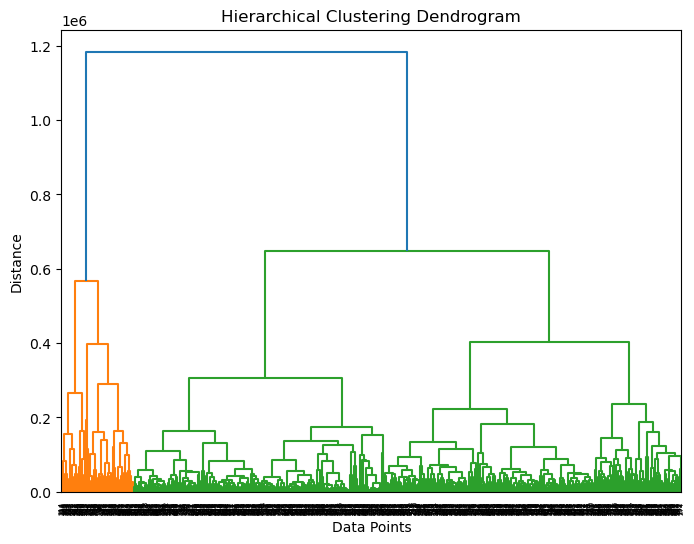

In [ ]:
# Step 5: Visualize the dendrogram
plt.figure(figsize=(8, 6))
sch.dendrogram(dendrogram)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

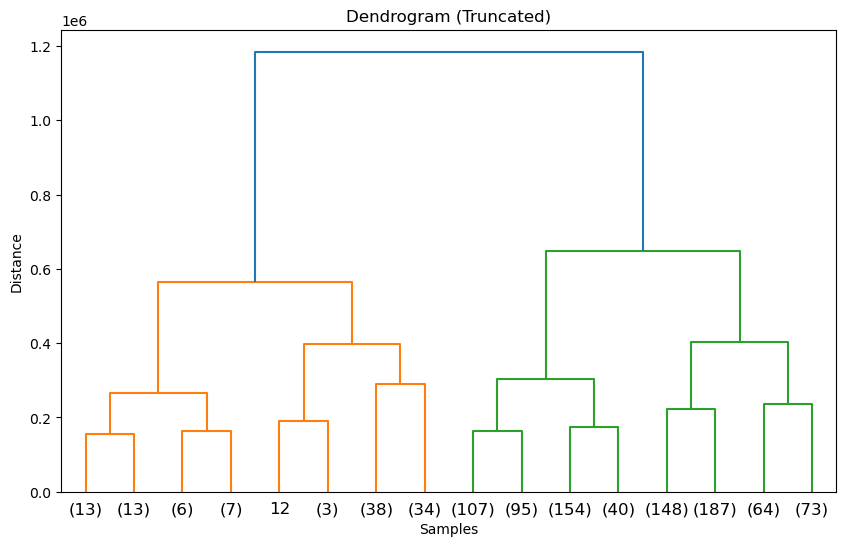

In [ ]:
# Plot the dendrogram with truncation
plt.figure(figsize=(10, 6))
sch.dendrogram(dendrogram, truncate_mode='level', p=3)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram (Truncated)')
plt.show()


In [ ]:
# Step 6: Assign data points to clusters
print("Data Point\tCluster")
for i, label in enumerate(labels):
    print(f"{i}\t\t{label}")

Data Point	Cluster
0		4
1		4
2		3
3		4
4		3
5		3
6		5
7		5
8		3
9		4
10		1
11		3
12		2
13		3
14		3
15		4
16		2
17		4
18		2
19		5
20		3
21		5
22		5
23		3
24		3
25		5
26		3
27		5
28		5
29		2
30		3
31		4
32		2
33		3
34		4
35		3
36		3
37		2
38		2
39		5
40		4
41		4
42		3
43		5
44		3
45		3
46		3
47		4
48		4
49		3
50		5
51		3
52		3
53		3
54		2
55		4
56		4
57		3
58		4
59		5
60		4
61		3
62		3
63		1
64		4
65		4
66		3
67		2
68		3
69		3
70		3
71		4
72		4
73		3
74		4
75		5
76		5
77		1
78		4
79		3
80		4
81		3
82		3
83		4
84		5
85		3
86		3
87		3
88		3
89		3
90		4
91		4
92		3
93		4
94		3
95		4
96		2
97		3
98		2
99		3
100		5
101		4
102		3
103		4
104		3
105		3
106		2
107		5
108		3
109		5
110		3
111		4
112		4
113		3
114		2
115		4
116		4
117		2
118		3
119		4
120		3
121		4
122		3
123		4
124		5
125		4
126		3
127		4
128		3
129		4
130		5
131		4
132		4
133		4
134		4
135		2
136		3
137		4
138		4
139		3
140		4
141		5
142		3
143		4
144		4
145		5
146		1
147		3
148		4
149		4
150		5
151		5
152		5
153		3
154		4
155		4

In [ ]:
labels

array([4, 4, 3, 4, 3, 3, 5, 5, 3, 4, 1, 3, 2, 3, 3, 4, 2, 4, 2, 5, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 2, 3, 4, 2, 3, 4, 3, 3, 2, 2, 5, 4, 4, 3, 5,
       3, 3, 3, 4, 4, 3, 5, 3, 3, 3, 2, 4, 4, 3, 4, 5, 4, 3, 3, 1, 4, 4,
       3, 2, 3, 3, 3, 4, 4, 3, 4, 5, 5, 1, 4, 3, 4, 3, 3, 4, 5, 3, 3, 3,
       3, 3, 4, 4, 3, 4, 3, 4, 2, 3, 2, 3, 5, 4, 3, 4, 3, 3, 2, 5, 3, 5,
       3, 4, 4, 3, 2, 4, 4, 2, 3, 4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 5, 4,
       4, 4, 4, 2, 3, 4, 4, 3, 4, 5, 3, 4, 4, 5, 1, 3, 4, 4, 5, 5, 5, 3,
       4, 4, 3, 3, 2, 3, 4, 1, 2, 2, 4, 3, 4, 4, 4, 4, 4, 3, 4, 5, 5, 4,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 5, 5, 3, 3, 4, 3, 3, 3, 1,
       3, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 3, 2, 3,
       3, 3, 1, 1, 5, 4, 3, 3, 4, 5, 1, 3, 3, 3, 2, 3, 3, 4, 5, 4, 3, 4,
       3, 4, 5, 5, 3, 2, 4, 5, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 3, 4, 4, 3,
       4, 4, 4, 3, 4, 5, 4, 5, 4, 4, 5, 5, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3,
       5, 3, 3, 3, 4, 3, 4, 4, 5, 3, 3, 4, 5, 2, 3,

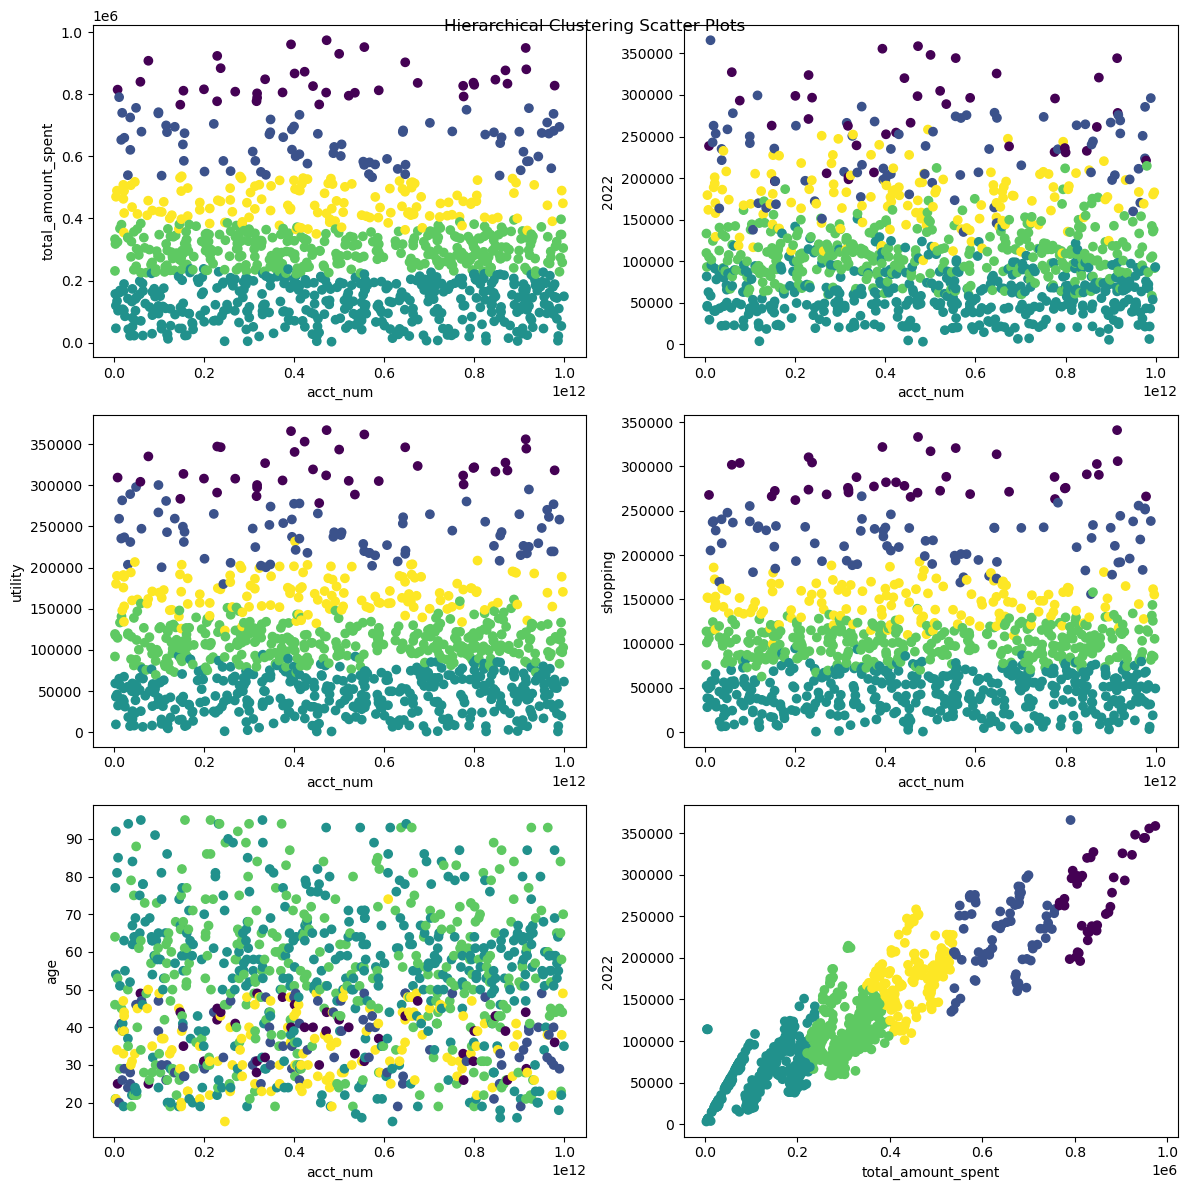

In [ ]:
cluster_labels = labels
# Specify the features for which you want to create scatter plots
feature1 = 'acct_num'
feature2 = 'total_amount_spent'
feature3 = 2022  
feature4 = 'utility'
feature5 = 'shopping'
feature6 = 'age'

# Create subplots for the scatter plots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot scatter plots for each pair of features
axs[0, 0].scatter(df[feature1], df[feature2], c=cluster_labels, cmap='viridis')
axs[0, 0].set_xlabel(feature1)
axs[0, 0].set_ylabel(feature2)

axs[0, 1].scatter(df[feature1], df[feature3], c=cluster_labels, cmap='viridis')
axs[0, 1].set_xlabel(feature1)
axs[0, 1].set_ylabel(feature3)

axs[1, 0].scatter(df[feature1], df[feature4], c=cluster_labels, cmap='viridis')
axs[1, 0].set_xlabel(feature1)
axs[1, 0].set_ylabel(feature4)

axs[1, 1].scatter(df[feature1], df[feature5], c=cluster_labels, cmap='viridis')
axs[1, 1].set_xlabel(feature1)
axs[1, 1].set_ylabel(feature5)

axs[2, 0].scatter(df[feature1], df[feature6], c=cluster_labels, cmap='viridis')
axs[2, 0].set_xlabel(feature1)
axs[2, 0].set_ylabel(feature6)

axs[2, 1].scatter(df[feature2], df[feature3], c=cluster_labels, cmap='viridis')
axs[2, 1].set_xlabel(feature2)
axs[2, 1].set_ylabel(feature3)

# Adjust spacing between subplots
plt.tight_layout()

# Set the main title for the scatter plots
plt.suptitle('Hierarchical Clustering Scatter Plots')

# Show the plots
plt.show()


### 6. Comparing the Performance Score of both the clustering models using Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# For K-means clustering
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
print("Silhouette score for K-means clustering:", kmeans_silhouette)

Silhouette score for K-means clustering: 0.07293651561473026


In [ ]:
# For Hierarchical clustering
hierarchical_silhouette = silhouette_score(X1, labels)
print("Silhouette score for Hierarchical clustering:", hierarchical_silhouette)

Silhouette score for Hierarchical clustering: 0.4433087960889765


#### As we can see from the scores, the hierarchical clustering model perfoms better than the kmeans. Thereby the furhter analysis will be done using the heirarchical clustering model

In [ ]:
df = pd.concat([df_final, pd.Series(labels, name='Cluster')], axis=1)

In [ ]:
df.shape

(983, 16)

In [ ]:
df

,acct_num,age,job,gender,total_amount_spent,mean_distance,entertainment,miscellaneous,shopping,utility,2018,2019,2020,2021,2022,Cluster
0,2348758451,46,"Surveyor, minerals",M,231213.49,46.105705,33624.91,29526.36,76066.33,91995.89,96.050000,44751.59,42558.63,33854.14,109953.08,4
1,2468061102,64,"Nurse, adult",F,333584.22,48.802957,65231.17,35086.77,113876.59,119389.69,5.750000,71680.46,65693.82,62842.91,133361.28,4
2,3005591724,77,"Engineer, automotive",F,157228.81,45.945575,30790.58,14823.07,52330.66,59284.50,9.470000,28348.92,20984.32,26084.58,81801.52,3
3,3418322859,21,Operational investment banker,F,317894.68,47.842071,62692.40,36252.98,101248.83,117700.47,147.113202,81852.64,70155.04,72729.50,93157.50,4
4,4322238535,92,Catering manager,M,119646.95,51.673790,23025.93,15025.52,38516.20,43079.30,147.113202,28855.27,25590.28,19874.23,45327.17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,994419325906,38,Adult guidance worker,F,489864.86,48.345622,61533.11,77867.54,161523.63,188940.58,471.040000,138915.67,94457.26,75728.62,180292.27,5
979,995642772692,44,"Merchandiser, retail",M,258501.10,48.733033,46914.63,29118.78,85361.51,97106.18,147.113202,43919.04,39905.62,36905.87,137770.57,4
980,997039479727,49,Secondary school teacher,M,448896.34,48.997026,76159.15,46832.22,155334.73,170570.24,117.460000,95788.01,84064.58,85971.43,182954.86,5
981,997762397943,70,"Social research officer, government",M,304927.71,48.096943,63238.44,33302.97,105480.29,102906.01,8.140000,67036.33,79074.84,67050.30,91758.10,4


### 7. Analysis and Evaluating the Clusters

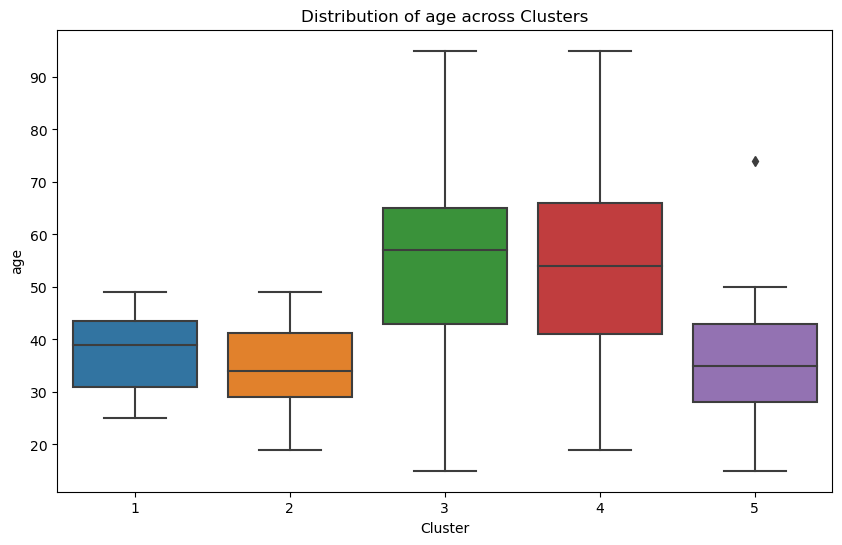

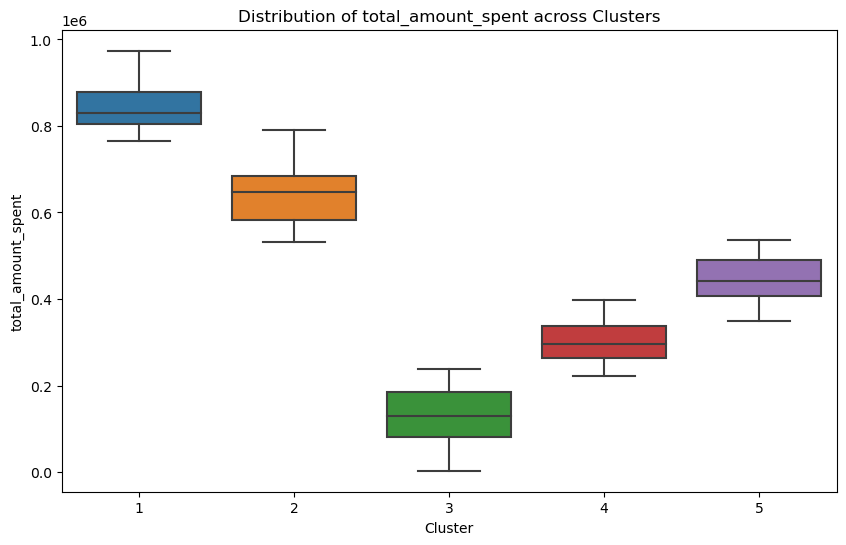

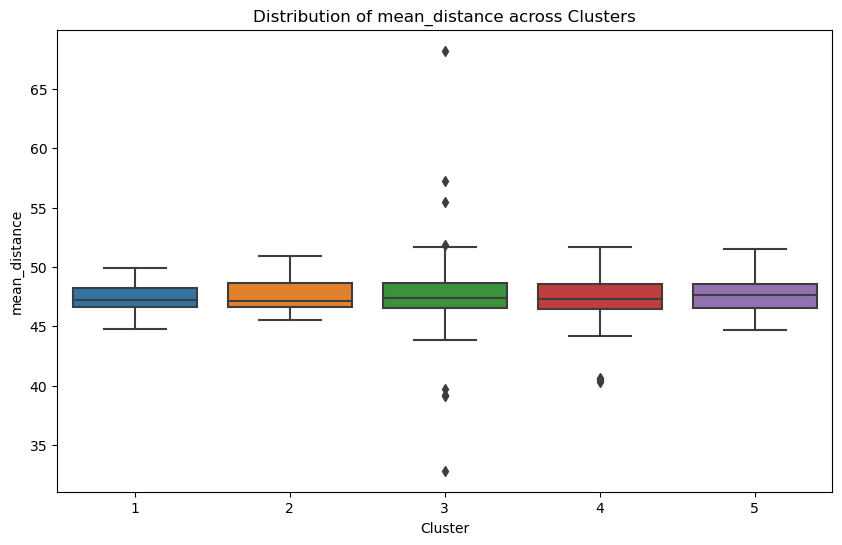

In [ ]:
# Analyze the distribution of each feature within each cluster
features = ['age', 'total_amount_spent', 'mean_distance']
clusters = ['Cluster']  # Assuming 'kmeans' is the column representing the cluster labels

# Create box plots for each feature, grouped by cluster
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Cluster', y=feature)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()



In [ ]:
# Examine cluster characteristics
cluster_means = df.groupby('Cluster').mean()
cluster_means

,acct_num,age,total_amount_spent,mean_distance,entertainment,miscellaneous,shopping,utility,2018,2019,2020,2021,2022
Cluster,,,,,,,,,,,,,
1,4.847754e+11,37.615385,845642.597949,47.377600,113309.512051,124317.784359,287189.924872,320825.376667,356.278021,242200.575385,172804.451026,155183.747436,275112.634615
2,4.899426e+11,35.276316,640684.353026,47.576099,92971.619868,91958.328026,214775.445921,240978.959211,222.733227,168645.540658,126329.472632,118792.238421,226715.660789
3,5.190698e+11,54.590909,128113.264394,47.575565,24618.899396,14408.002323,44016.410126,45971.176061,126.040566,42479.491202,39354.679169,37368.114082,59984.642766
4,4.955741e+11,53.597015,299295.828657,47.485155,55186.946776,33887.622269,100868.499612,109352.760000,125.550940,66653.626299,62841.904627,60405.328478,109319.480716
5,4.585185e+11,35.459854,447312.226715,47.636948,75877.055401,56984.669270,145759.077591,168691.424453,159.256062,99513.346934,87586.537007,85582.517737,174494.192993


In [ ]:
# Perform feature importance analysis
# Assuming '2018', '2019', '2020', '2021', '2022' are the columns representing the years
# Perform feature importance analysis
year_columns = [2018, 2019, 2020, 2021, 2022]
feature_importance = cluster_means[year_columns].sum()
print(feature_importance)


2018       989.858816
2019    619492.580477
2020    488917.044460
2021    457331.946154
2022    845626.611880
dtype: float64


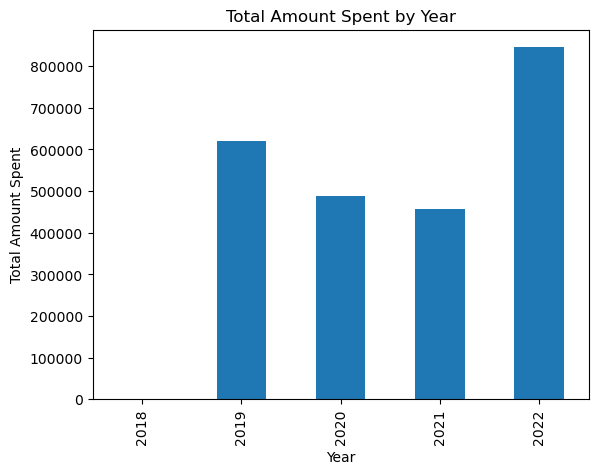

In [ ]:
# Visualize# Visualize and communicate insights
feature_importance.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Year')
plt.show()

In [ ]:
# Select the relevant columns for analysis
columns_of_interest = ['Cluster', 'total_amount_spent', 2018, 2019, 2020, 2021, 2022]

# Filter the dataframe to include only the columns of interest
filtered_df1 = df[columns_of_interest]

# Group the data by 'kmeans' (cluster) and year columns, and calculate the sum of 'total_amount_spent'
grouped_df1 = filtered_df1.groupby(['Cluster', 2018, 2019, 2020, 2021, 2022]).sum().reset_index()

In [ ]:
grouped_df1

,Cluster,2018,2019,2020,2021,2022,total_amount_spent
0,1,7.74,259771.82,175745.34,167020.47,205764.96,808310.33
1,1,11.94,250736.44,181322.95,169113.62,236081.40,837266.35
2,1,47.96,209937.11,149882.32,137141.99,295696.44,792705.82
3,1,86.68,218428.51,157829.23,129941.82,271046.85,777333.09
4,1,90.63,250250.55,175233.95,156425.66,348078.87,930079.66
...,...,...,...,...,...,...,...
978,5,471.04,138915.67,94457.26,75728.62,180292.27,489864.86
979,5,475.11,140195.98,92064.56,83187.24,186020.09,501942.98
980,5,510.19,133101.20,100756.99,83021.22,217739.01,535128.61
981,5,518.17,85867.64,82976.51,84590.29,156627.72,410580.33


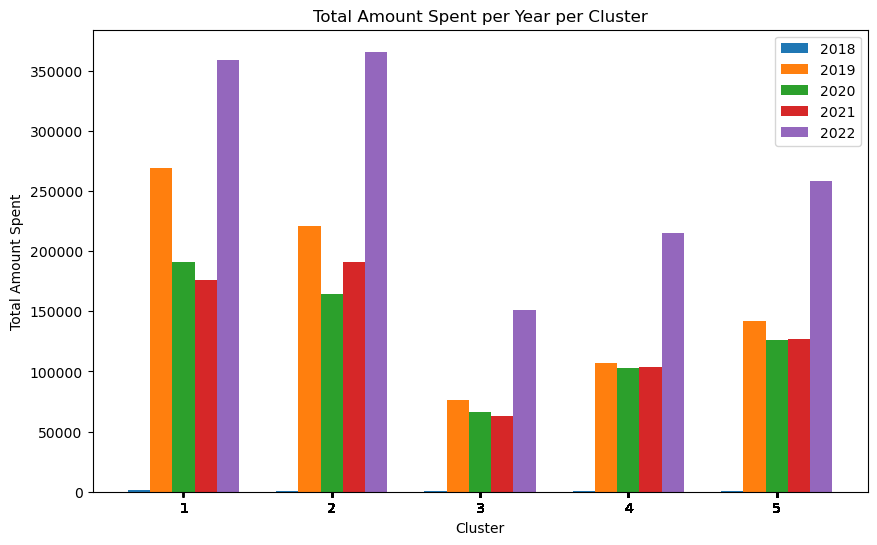

In [ ]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Grouped bar plot
x = grouped_df1['Cluster']
years = [2018, 2019, 2020, 2021, 2022]
bar_width = 0.15

for i, year in enumerate(years):
    plt.bar(x + i * bar_width, grouped_df1[year], width=bar_width, label=year)

# Set the x-axis labels and tick labels
plt.xlabel('Cluster')
plt.ylabel('Total Amount Spent')
plt.xticks(x + bar_width * 2, x)
plt.legend(years)

# Set the plot title
plt.title('Total Amount Spent per Year per Cluster')

# Show the plot
plt.show()

/var/folders/lz/7z4s1cw55w31v9lp9ryhn6_h0000gn/T/ipykernel_1629/3893941822.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df2 = df.groupby('Cluster')['entertainment', 'miscellaneous', 'shopping', 'utility'].sum()


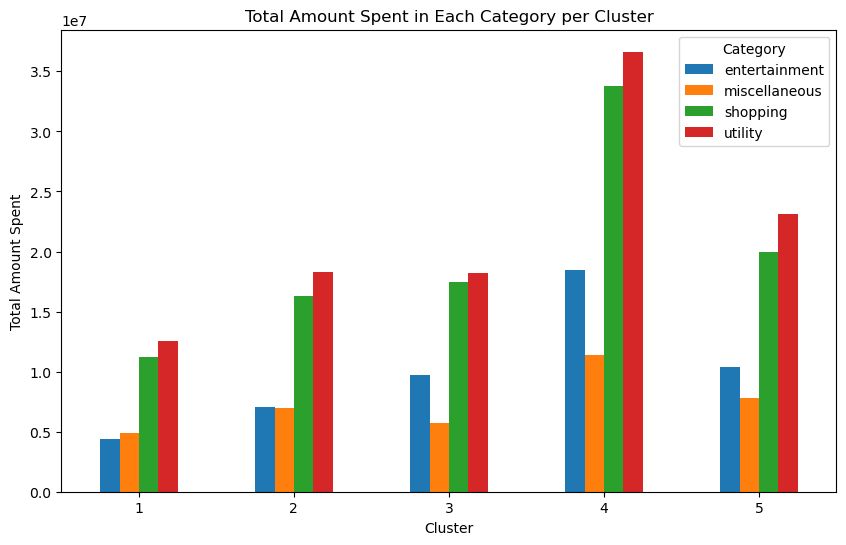

In [ ]:

# Group the dataframe by 'cluster' and calculate the sum of each category
grouped_df2 = df.groupby('Cluster')['entertainment', 'miscellaneous', 'shopping', 'utility'].sum()


# Plotting the bar chart
grouped_df2.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent in Each Category per Cluster')
plt.xticks(rotation=0)
plt.legend(title='Category')

# Display the bar chart
plt.show()

###### Reference - Some parts of the code were referenced from Lab Solutions 7 and Lab Solutions 8